In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [2]:
import zipfile
import os

# Define file and extraction path
zip_path = 'archive.zip'
extract_to = 'mimic_data'

# Extract the archive.zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Files extracted to:", extract_to)


✅ Files extracted to: mimic_data


In [4]:
import os

# List all files inside mimic_data recursively
for root, dirs, files in os.walk("/content/mimic_data"):
    for file in files:
        print(os.path.join(root, file))


/content/mimic_data/mimic-iii-clinical-database-demo-1.4/ADMISSIONS.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/CPTEVENTS.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/PROCEDUREEVENTS_MV.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/D_CPT.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/MICROBIOLOGYEVENTS.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/LABEVENTS.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/OUTPUTEVENTS.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/PRESCRIPTIONS.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/NOTEEVENTS.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/PROCEDURES_ICD.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/DRGCODES.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/D_LABITEMS.csv
/content/mimic_data/mimic-iii-clinical-database-demo-1.4/LICENSE.txt
/content/mimic_data/mimic-iii-clinical-database-dem

In [5]:
data_path = '/content/mimic_data/mimic-iii-clinical-database-demo-1.4/'


In [6]:
import pandas as pd

# Load the CSV files from correct path
diagnoses = pd.read_csv(data_path + 'DIAGNOSES_ICD.csv')
patients = pd.read_csv(data_path + 'PATIENTS.csv')
admissions = pd.read_csv(data_path + 'ADMISSIONS.csv')

# Preview data
print("Diagnoses:")
print(diagnoses.head())


Diagnoses:
   row_id  subject_id  hadm_id  seq_num icd9_code
0  112344       10006   142345        1     99591
1  112345       10006   142345        2     99662
2  112346       10006   142345        3      5672
3  112347       10006   142345        4     40391
4  112348       10006   142345        5     42731


In [7]:
diagnoses.shape


(1761, 5)

In [8]:
# Group ICD codes by admission (hadm_id)
from collections import defaultdict

admission_diseases = diagnoses.groupby('hadm_id')['icd9_code'].apply(list)
print(admission_diseases.head())


hadm_id
100375    [0389, 5990, 5845, 2765, 78552, 42831, 4280, 2...
100969    [43411, 3484, 51881, 5070, 42731, 25000, 4019,...
101361    [99731, 51884, 5180, 5119, V4611, 5849, 3481, ...
102203    [5722, 5849, 78959, 261, 5724, 2763, 2762, 571...
103379    [03842, 78552, 486, 00845, 1977, 1561, 1975, 4...
Name: icd9_code, dtype: object


In [9]:
from itertools import combinations
import networkx as nx

# Initialize graph
G = nx.Graph()
edge_counts = defaultdict(int)

# Build edge list from co-occurring ICD codes
for disease_list in admission_diseases:
    unique_codes = list(set(disease_list))  # Avoid self-loops
    for disease1, disease2 in combinations(unique_codes, 2):
        edge_counts[(disease1, disease2)] += 1

# Add edges with weights
for (d1, d2), weight in edge_counts.items():
    G.add_edge(d1, d2, weight=weight)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


Graph has 581 nodes and 10256 edges


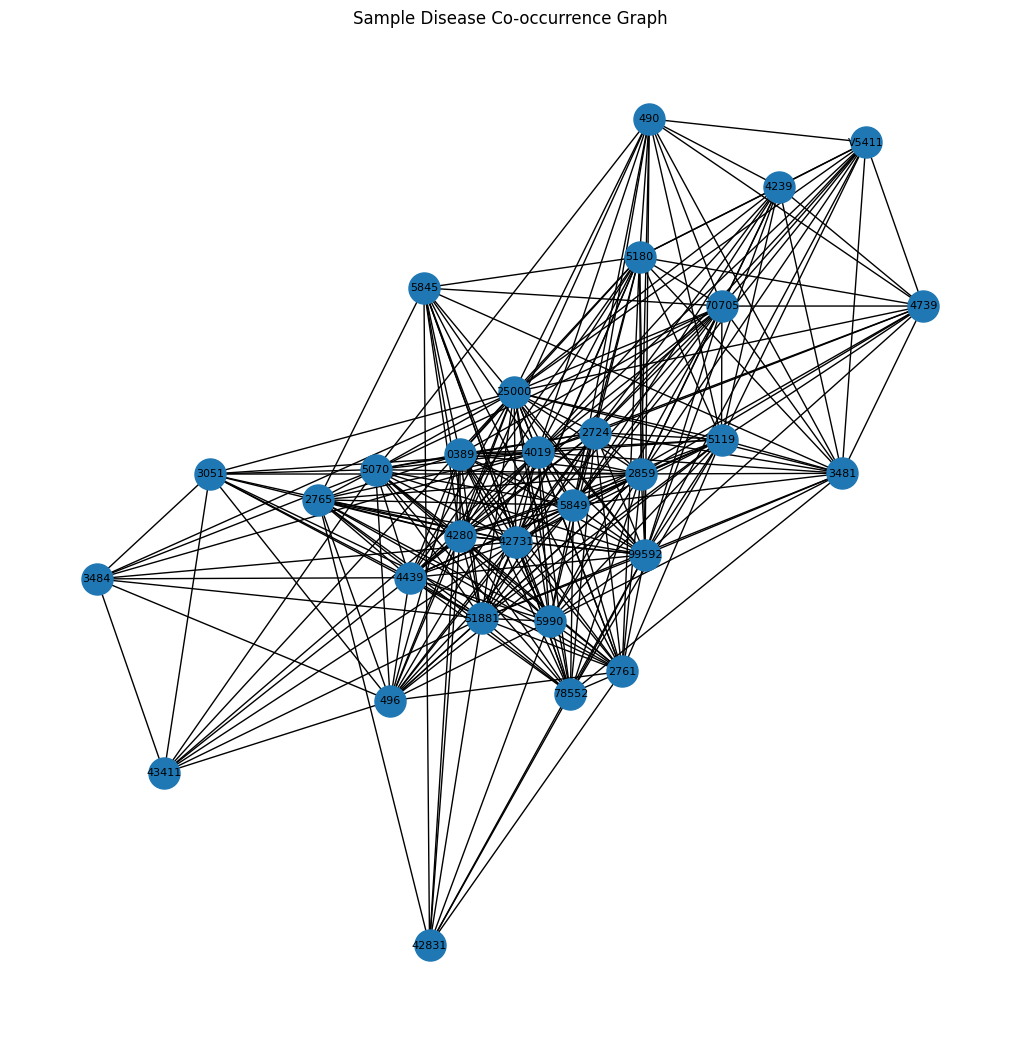

In [10]:
import matplotlib.pyplot as plt

# Sample a small subgraph
small_G = G.subgraph(list(G.nodes)[:30])  # Pick first 30 ICD codes

plt.figure(figsize=(10, 10))
nx.draw(small_G, with_labels=True, node_size=500, font_size=8)
plt.title("Sample Disease Co-occurrence Graph")
plt.show()


In [11]:
!pip install torch torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 817.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [12]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx

# Assume G is your networkx graph from earlier
pyg_graph = from_networkx(G)

# Optionally, add features if available (we'll use dummy ones for now)
num_nodes = G.number_of_nodes()
pyg_graph.x = torch.eye(num_nodes)  # Identity matrix as node features


In [13]:
target_disease = '25000'
labels = []

for node in G.nodes():
    co_occurs = target_disease in list(G.neighbors(node))
    labels.append(int(co_occurs))

pyg_graph.y = torch.tensor(labels, dtype=torch.long)


In [14]:
from sklearn.model_selection import train_test_split

num_nodes = pyg_graph.num_nodes
indices = list(range(num_nodes))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True

pyg_graph.train_mask = train_mask
pyg_graph.test_mask = test_mask


In [15]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.nn as nn

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model = GCN(in_channels=pyg_graph.num_node_features, hidden_channels=16, out_channels=2)


In [16]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.NLLLoss()

model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(pyg_graph)
    loss = loss_fn(out[pyg_graph.train_mask], pyg_graph.y[pyg_graph.train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")


Epoch 0 | Loss: 0.6934
Epoch 10 | Loss: 0.6269
Epoch 20 | Loss: 0.5284
Epoch 30 | Loss: 0.4307
Epoch 40 | Loss: 0.3532
Epoch 50 | Loss: 0.2962
Epoch 60 | Loss: 0.2568
Epoch 70 | Loss: 0.2283
Epoch 80 | Loss: 0.2072
Epoch 90 | Loss: 0.1913


In [17]:
model.eval()
pred = model(pyg_graph).argmax(dim=1)

correct = pred[pyg_graph.test_mask] == pyg_graph.y[pyg_graph.test_mask]
acc = int(correct.sum()) / int(pyg_graph.test_mask.sum())
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.8718


In [18]:
!pip install gradio


In [19]:
import gradio as gr
import pandas as pd
import torch
import networkx as nx
import matplotlib.pyplot as plt


In [20]:
!pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.1 MB/s eta 0:00:00


In [21]:
from pyvis.network import Network
import networkx as nx
from IPython.display import display, HTML

def draw_interactive_graph(icd_list):
    G = nx.Graph()
    for i, d1 in enumerate(icd_list):
        for d2 in icd_list[i+1:]:
            G.add_edge(d1, d2)

    net = Network(notebook=True)
    net.from_nx(G)
    net.show("disease_graph.html")
    return "disease_graph.html"


In [22]:
def full_pipeline(icd_input):
    icd_list = [code.strip() for code in icd_input.split(",")]
    df = predict_comorbidities(icd_input)
    html_graph = draw_interactive_graph(icd_list)
    return df, html_graph, "predictions.csv"


In [23]:
!pip install shap


In [25]:
import pandas as pd

def predict_comorbidities(icd_input):
    icd_list = [code.strip() for code in icd_input.split(',')]
    results = []

    # Dummy: assign fake risk score
    for code in icd_list:
        risk = round(0.6 + (hash(code) % 40) / 100, 2)
        results.append((code, risk))

    df = pd.DataFrame(results, columns=["ICD Code", "Risk Score"])
    return df


In [26]:
import gradio as gr

def run_prediction(icd_input, file_upload):
    if file_upload:
        df = pd.read_csv(file_upload.name)
        icd_list = df['icd9_code'].dropna().astype(str).tolist()
    elif icd_input:
        icd_list = [x.strip() for x in icd_input.split(",")]
    else:
        return "Please enter ICDs or upload a file", None

    # Predict
    icd_str = ",".join(icd_list)
    predictions = predict_comorbidities(icd_str)

    # Save to CSV
    predictions.to_csv("prediction_result.csv", index=False)
    return predictions, "prediction_result.csv"


In [27]:
iface = gr.Interface(
    fn=run_prediction,
    inputs=[
        gr.Textbox(label="Enter ICD-9 Codes (comma-separated)", placeholder="40391, 42731"),
        gr.File(label="Upload ICD CSV File (with icd9_code column)")
    ],
    outputs=[
        gr.Dataframe(label="Predicted Comorbidities"),
        gr.File(label="Download Prediction CSV")
    ],
    title="Multimorbidity Prediction GNN Dashboard",
    description="🔍 Enter ICD-9 codes to visualize disease co-occurrence and get comorbidity risk predictions."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c6fcb5a73ffc03b85.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
